In [64]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.model_selection import (StratifiedKFold, cross_val_score,
                                     train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


warnings.filterwarnings("ignore")


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   

   bank_arg1  bank_arg2   y  
0       0.15       0.18  no  
1       0.17       0.13  no  
2       0.38       0.20  no  
3       

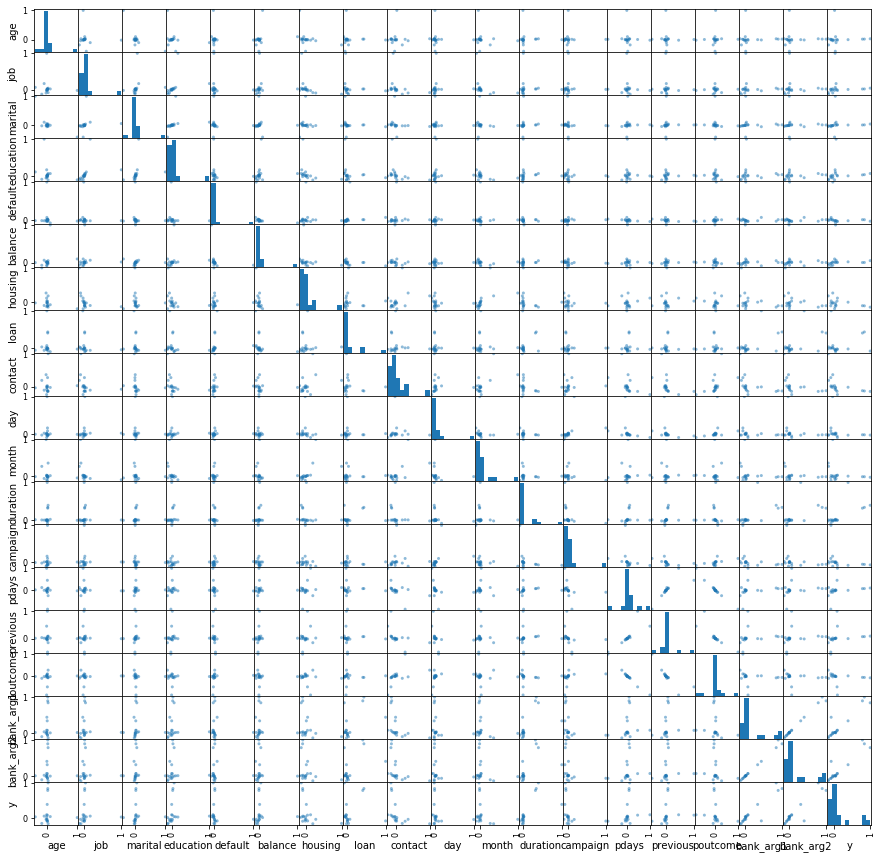

In [2]:
raw_dataset = read_csv(r'bank.csv')
dataset = read_csv(r'bank.csv')

# Pre-processing dataset, converting categorical attributes to numeric
le_en = preprocessing.LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    dataset[col] = dataset[col].astype('category')
    dataset[col] = le_en.fit_transform(dataset[col])
# print(dataset.dtypes)
print(raw_dataset.head())

dataset.head(2)
raw_dataset.head(2)

print(f"Shape: {dataset.shape}")


scatter_matrix(dataset.corr(), figsize=(15,15))
plt.show()


## 1. Create two data-sets as follows:

  * (a) **Dataset 1**: age,job,poutcome, balance, default and y, where y is the class attribute.

  * (b) **Dataset 2**: age,job,poutcome, balance, default and loan, where loan is the class attribute.

### Apply a classification algorithm on each dataset and report the error. Which dataset has a higher accuracy (lower error)? Note, all the data should be used for training the model from both datasets.

In [3]:
def test_accuracy(ds):
    array = ds.values
    # 6th column (index 5) is 'y' for Dataset 1, 'loan' for Dataset 2
    X = array[:,0:5]
    Y = array[:,5]
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=1, random_state=1)

    # Tested all these algorithms. LogisticRegression (LR) resulted in the highest accuracy.
    #   LR: Accuracy: 0.882714 - Error: 0.117286 (Std Dev: 0.000201)
    #   LDA: Accuracy: 0.882438 - Error: 0.117562 (Std Dev: 0.000389)
    #   KNN: Accuracy: 0.869857 - Error: 0.130143 (Std Dev: 0.002554)
    #   CART: Accuracy: 0.818735 - Error: 0.181265 (Std Dev: 0.007136)
    #   NB: Accuracy: 0.870327 - Error: 0.129673 (Std Dev: 0.001553)

    model = ('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model[1], X_train, Y_train, cv=kfold, scoring='accuracy')
    print('%s: Accuracy: %f - Error: %f (Std Dev: %f)' % (model[0], cv_results.mean(), (1 - cv_results.mean()), cv_results.std()))
    return 1 - cv_results.mean()


# Dataset 1
dataset_1 = dataset[['age','job','poutcome','balance','default', 'y']]
print("\n💽 Dataset 1:")
error_1 = test_accuracy(dataset_1)

# Dataset 2
dataset_2 = dataset[['age','job','poutcome','balance','default', 'loan']]
print("\n💽 Dataset 2:")
error_2 = test_accuracy(dataset_2)

print("\n🔎 Dataset 1" if error_1 < error_2 else "Dataset 2", "has higher accuracy (lower error)")




💽 Dataset 1:
LR: Accuracy: 0.882924 - Error: 0.117076 (Std Dev: 0.000173)

💽 Dataset 2:
LR: Accuracy: 0.839792 - Error: 0.160208 (Std Dev: 0.000142)

🔎 Dataset 1 has higher accuracy (lower error)


### 2. Create a dataset by using: _age_ and **marital**. Apply an unsupervised learning algorithm and cluster all the individuals in the dataset. Determine the optimal number of clusters/groups for your dataset using an appropriate visualization technique.



🎯 Data points and distances to clusters centers:
     Object  X_value  Y_value  C1_Distance  C2_Distance  C3_Distance  Cluster
0  Object 1        1       58     8.000000     8.062258     8.062258  Married
1  Object 2        2       44     6.082763     6.000000     6.324555   Single
2  Object 3        1       33    17.000000    17.029386    17.029386  Married
3  Object 4        1       47     3.000000     3.162278     3.162278  Married
4  Object 5        2       33    17.029386    17.000000    17.117243   Single

🎯 Centroid 1 (Married) (1.0, 43.40809877269053)
🎯 Centroid 2 (Single) (2.0, 33.7034401876466)
🎯 Centroid 3 (Divorced) (0.0, 45.78298444401767)


🎯 Centroids after model fit:
[[31.67274242  1.41756088]
 [56.4044536   0.87659407]
 [43.08399507  1.02183735]]


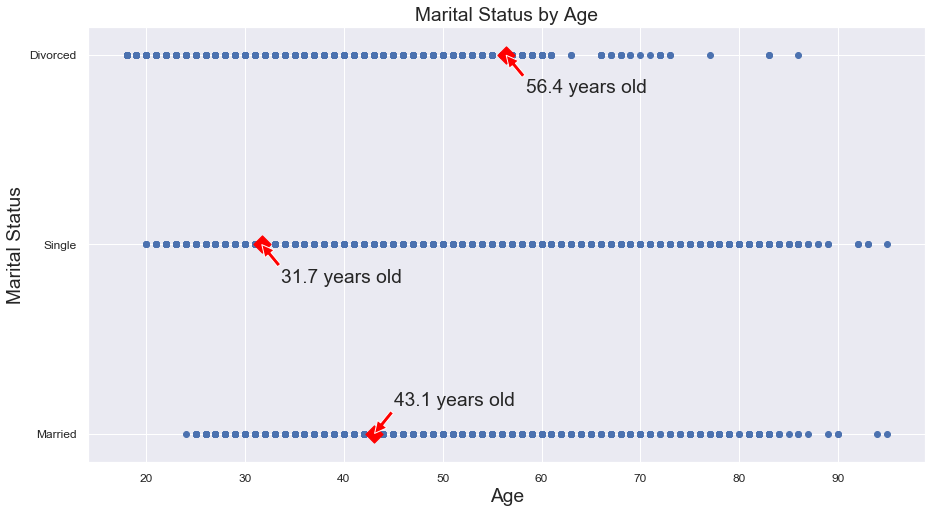

In [4]:

# am = raw_dataset[['age','marital']]
am = dataset[['age','marital']]

plt.figure(figsize=(15, 8))


# Generate object header for the data points
obj_names = []
for i in range(1, len(am)+1):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': am['marital'],
    'Y_value': am['age']
})    

# print(data.head())

# 0 - divorced
# 1 - married
# 2 - single

marital_status = am['marital'].unique()
marital_status_str = [s.title() for s in raw_dataset['marital'].unique()] 

# Initialize the centroids
c1 = (marital_status[0], 50)
c2 = (marital_status[1], 50)
c3 = (marital_status[2], 50)

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance 
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)
    
# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': marital_status_str[0], 'C2_Distance': marital_status_str[1], 'C3_Distance': marital_status_str[2]})
    
# Get a preview of the data
print("\n🎯 Data points and distances to clusters centers:")
print(data.head())




# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']==marital_status_str[0]]['X_value'].mean()
y_new_centroid1 = data[data['Cluster']==marital_status_str[0]]['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']==marital_status_str[1]]['X_value'].mean()
y_new_centroid2 = data[data['Cluster']==marital_status_str[1]]['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 3
x_new_centroid3 = data[data['Cluster']==marital_status_str[2]]['X_value'].mean()
y_new_centroid3 = data[data['Cluster']==marital_status_str[2]]['Y_value'].mean()

# Print the coordinates of the new centroids
print('\n🎯 Centroid 1 ({}) ({}, {})'.format(marital_status_str[0], x_new_centroid1, y_new_centroid1))
print('🎯 Centroid 2 ({}) ({}, {})'.format(marital_status_str[1], x_new_centroid2, y_new_centroid2))
print('🎯 Centroid 3 ({}) ({}, {})\n'.format(marital_status_str[2], x_new_centroid3, y_new_centroid3))




# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(am)

# Get the cluster centroids
print("\n🎯 Centroids after model fit:")
print(kmeans.cluster_centers_)
    
    


# Plotting the cluster centers and the data points on a 2D plane

sns.set(font_scale=1.6)

# Scatter plots dataset
plt.scatter(am['age'], am['marital'])

# Scatter plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], am['marital'].unique(), c='red', marker='D', s=150)
    
plt.title('Marital Status by Age')
plt.xlabel('Age')
plt.ylabel('Marital Status')
plt.tick_params(labelsize=12, pad=6)
plt.yticks(np.arange(3), marital_status_str)

age1 = kmeans.cluster_centers_[0,0]
age2 = kmeans.cluster_centers_[1,0]
age3 = kmeans.cluster_centers_[2,0]

# Annotate centroids' ages
plt.annotate(f"{round(age1, 1)} years old", 
             xy=(age1, marital_status[0]), 
             xytext=(age1 +2, marital_status[0] -0.2 ), 
             arrowprops=dict(facecolor='red', shrink=0.01))
             
plt.annotate(f"{round(age2, 1)} years old", 
             xy=(age2, marital_status[1]), 
             xytext=(age2 +2, marital_status[1] -0.2 ), 
             arrowprops=dict(facecolor='red', shrink=0.01))
             
plt.annotate(f"{round(age3, 1)} years old", 
             xy=(age3, marital_status[2]), 
             xytext=(age3 +2, marital_status[2] +0.15 ), 
             arrowprops=dict(facecolor='red', shrink=0.01))
             
plt.show()




### 3. _bank_arg1_ attribute is a continuous valued attribute. Convert this attribute to discreet valued attribute using n buckets. Create a dataset using _y_, _loan_ and _bank_arg1_. Consider _bank_arg1_ as the class attribute (target class). Apply a supervised learning algorithm to train a model for predicting the class attribute. Test the algorithm with different values for **n** and report which one has the better accuracy.

LR, n=2 -> Accuracy: 1.0 - Error: 0.0 (Std Dev: 0.0)
LR, n=3 -> Accuracy: 0.8966214499010328 - Error: 0.10337855009896724 (Std Dev: 0.0034304104422456503)
LR, n=4 -> Accuracy: 1.0 - Error: 0.0 (Std Dev: 0.0)
LR, n=5 -> Accuracy: 0.9443154223785907 - Error: 0.055684577621409326 (Std Dev: 0.00013305196766200318)
LR, n=6 -> Accuracy: 0.9072384340418036 - Error: 0.0927615659581964 (Std Dev: 0.0001436500092755722)
LR, n=10 -> Accuracy: 0.7021400218608781 - Error: 0.2978599781391219 (Std Dev: 0.00020107394054659782)
LR, n=20 -> Accuracy: 0.3628069101538703 - Error: 0.6371930898461298 (Std Dev: 0.00025106716345871087)


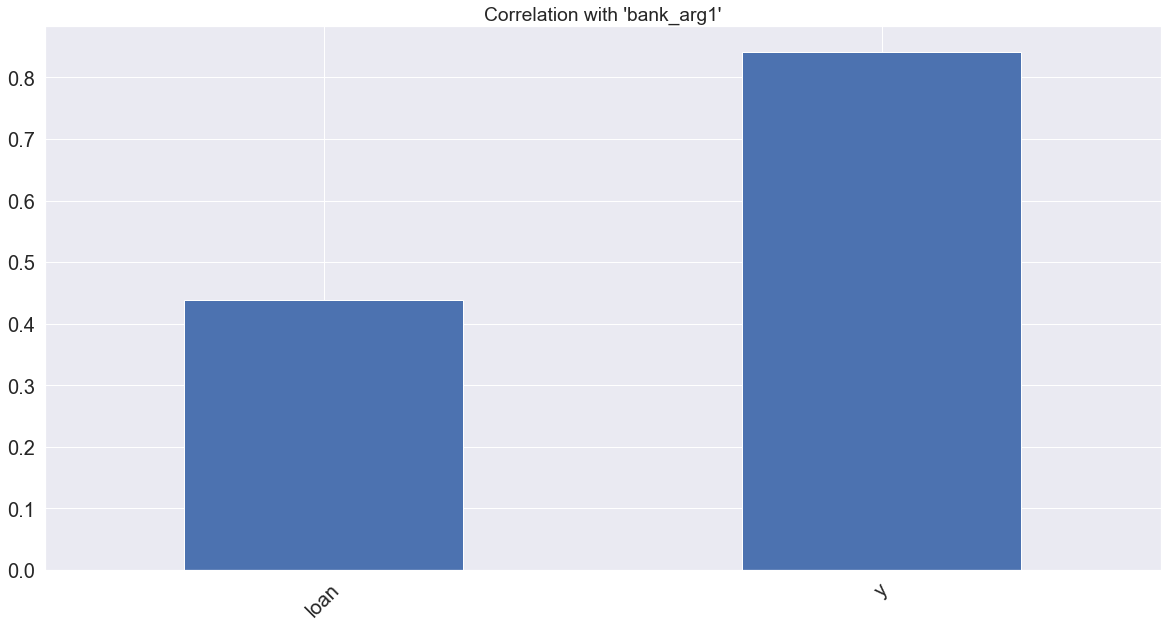

In [115]:
# Correlation Analysis with target variable 'y'
# We see a high correlation between 'y' and 'bank_arg1', of over 80%
df1 = ds.drop(['bank_arg1'],axis=1)
df1.corrwith(dataset['bank_arg1']).plot.bar(
        figsize = (20, 10), title = "Correlation with 'bank_arg1'", fontsize = 20,
        rot = 45, grid = True)


def test_accuracy( n):
    ds = dataset[['bank_arg1','loan','y']]
    ds['bank_arg1'] = pd.cut(ds['bank_arg1'], bins=n, labels=False)

    X = ds.drop(['bank_arg1'],axis=1)
    Y = ds['bank_arg1']
    
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

    model = ('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model[1], X_train, Y_train, cv=kfold, scoring='accuracy')
    print(f"{model[0]}, n={n} -> Accuracy: {cv_results.mean()} - Error: {(1 - cv_results.mean())} (Std Dev: {cv_results.std()})")


test_accuracy(2)
test_accuracy(3)
test_accuracy(4)
test_accuracy(5)
test_accuracy(6)
test_accuracy(10)
test_accuracy(20)

# Both n = 2 and n = 4 result in a 100% accuracy for our model, with a test size of 20 %


#### 4. Create a dataset using **age,job,marital, education,loan** and **y**. Consider *y* as your class attribute (target attribute).

#### Apply the following learning algorithms on your dataset:
  * KNeighborsClassifier
  * DecisionTreeClassifier
  * GaussianNB
  * SVM
  * RandomForestClassifier

#### Apply cross-validation technique, when test data is %25 of the whole data, and conclude which technique is the best one and why?


In [6]:
ds = dataset[['age','job', 'marital', 'education','loan', 'y']]

print(ds.head())

X = (ds.drop("y", 1))
Y = (ds["y"])


X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.25, random_state=1)


models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('Decission Tree', DecisionTreeClassifier()),
    ('GaussianNB', GaussianNB()),
    ('SVM', SVC(gamma='auto')),
    ('Random Forest', RandomForestClassifier())   
]

print("\nTesting models...")

highest = 0
highest_name = ''

for name, model in models:
    
    print(f"\nTesting model: {name} ...")
    kfold = StratifiedKFold(n_splits=5, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)  

    print(f"Accuracy: {accuracy_score(Y_validation, predictions)}")
    print(f"Accuracy (cross-validation): {cv_results.mean()}")
    
    if (cv_results.mean() > highest):
        highest = cv_results.mean()
        highest_name = name


print(f"\n📝 Most accurate technique is '{highest_name}' with {highest} accuracy")




   age  job  marital  education  loan  y
0   58    4        1          2     0  0
1   44    9        2          1     0  0
2   33    2        1          1     1  0
3   47    1        1          3     0  0
4   33   11        2          3     0  0

Testing models...

Testing model: KNeighbors ...
Accuracy: 0.8753428293373441
Accuracy (cross-validation): 0.8728911480118329

Testing model: Decission Tree ...
Accuracy: 0.8762275502079094
Accuracy (cross-validation): 0.8743069249426305

Testing model: GaussianNB ...
Accuracy: 0.8824205963018668
Accuracy (cross-validation): 0.8812374602462489

Testing model: SVM ...
Accuracy: 0.8834822613465452
Accuracy (cross-validation): 0.8827414935594454

Testing model: Random Forest ...
Accuracy: 0.8760506060337964
Accuracy (cross-validation): 0.8746312825865077

📝 Most accurate technique is 'SVM' with 0.8827414935594454 accuracy


#### 5. Use bank arg1 and bank arg2 attributes and apply an unsupervised learning algorithm to do the following:
* What is the best number of groups of individuals? Depict your answer visually.
* Visualize your data individuals and assign different color for each group. The centroid of each group should also be visualized.

   bank_arg1  bank_arg2
0       0.15       0.18
1       0.17       0.13
2       0.38       0.20
3       0.15       0.13
4       0.17       0.12


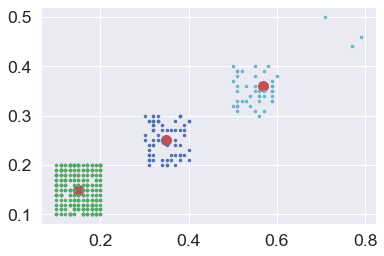

In [7]:
ds = dataset[['bank_arg1','bank_arg2']]

labels = ds.columns.values
colors = ["c.", "g.", "b."]

print(ds.head())

classifier = KMeans(n_clusters=3)
classifier.fit(ds)
center = classifier.cluster_centers_
kmeans_labels = classifier.labels_

# Note: plotting only 1 of each 100 points to make it faster to draw
for index in range(len(ds)):
    if(0 < index and index % 100 == 0):
        plt.plot(
            ds[labels[0]][index], 
            ds[labels[1]][index],
            colors[kmeans_labels[index]],
            markersize = 5,
        )

# Plot centers
plt.scatter(center[:,0], 
            center[:,1], 
            marker="o",
            c = "r",
            s = 100)
plt.show()

# Best number of groups is 3


#### 6. Create a dataset using *housing*, *balance* and *y*. Consider _**y**_ as your class attribute (target attribute). Apply decision tree classifier on your data. Depict when the problem of over-fitting happens and show how the problem of over-fitting can be resolved. (Hint: A high accuracy for training data and low accuracy for test data is a sign of over-fitting).

In [45]:
ds = dataset[['housing','balance', 'y']]

X = ds.drop("y", 1).values
Y = ds["y"].values

def test_model(test_size):
    
    # Training/testing sets 
    X_train = X[:-test_size] 
    X_test = X[-test_size:] 
    Y_train = Y[:-test_size] 
    Y_test = Y[-test_size:] 
    
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test) 
    
    print(f"\n🔎 X_train size: {len(X_train)}, X_test size: {len(X_test)}")
    print(f"   Accuracy test data: {100*accuracy_score(Y_test, predictions)} %")


test_model(25000)
test_model(10000)
test_model(10) 


# We see how accuracy decrease as we reduce the test size, due to overfitting.



🔎 X_train size: 20211, X_test size: 25000
   Accuracy test data: 81.756 %

🔎 X_train size: 35211, X_test size: 10000
   Accuracy test data: 71.08 %

🔎 X_train size: 45201, X_test size: 10
   Accuracy test data: 30.0 %


#### 7. Create a dataset using loan, balance, y and bank arg1. Split your data into training and test sets. Apply two supervised learning algorithms:
   * Decision Tree and Random Forest, to create a model for each algorithm.
#### Calculate the score when predicting the test data. Discuss which of them generates a better score. Note that the bank arg1 should be descritized.

In [88]:
ds = dataset[['loan','balance', 'bank_arg1', 'y']]


# Discretizing bank_arg1 into 5 bins:
bins_boundary = [0, 0.2, 0.4, 0.6, 0.8, 1]
ba1_labels = ['A','B','C','D','E']
ds['bank_arg1'] = pd.cut(ds['bank_arg1'], bins=5, labels=ba1_labels)


X = ds.drop("bank_arg1", 1)
X = X.drop("y", 1)
Y = ds["bank_arg1"]

print(ds.head())


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()


print(f"\nDecision Tree Classifier - Train: {len(X_train)}, Test: {len(X_test)}")
decision_tree.fit(X_train, Y_train)
predictions_decision_tree = decision_tree.predict(X_test)
print(f"Accuracy test data: {100*accuracy_score(Y_test, predictions_decision_tree)} %")



print(f"\nRandom Forest Classifier - Train: {len(Y_train)}, Test: {len(Y_test)}")
random_forest.fit(X_train, Y_train)
predictions_random_forest = random_forest.predict(X_test)
print(f"Accuracy test data: {100*accuracy_score(Y_test, predictions_random_forest)} %")


# Decision Tree is marginally better by around 0.6 %


   loan  balance bank_arg1  y
0     0     2143         A  0
1     0       29         A  0
2     1        2         B  0
3     0     1506         A  0
4     0        1         A  0

Decision Tree Classifier - Train: 40689, Test: 4522
Accuracy test data: 83.61344537815127 %

Random Forest Classifier - Train: 40689, Test: 4522
Accuracy test data: 83.06059265811587 %
